# Driver Laptimes Scatterplot

Plot a driver's lap times in a race, with color coding for the compounds.


In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting
fastf1.Cache.enable_cache('cache')

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

Load the race session.



In [10]:
race = fastf1.get_session(2024, "Jeddah", 'R')
race.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '22', '2', '3', '77', '24', '18', '10']


Get all the laps for a single driver.
Filter out slow laps as they distort the graph axis.



Make the scattterplot using lap number as x-axis and lap time as y-axis.
Marker colors correspond to the compounds used.
Note: as LapTime is represented by timedelta, calling setup_mpl earlier
is required.



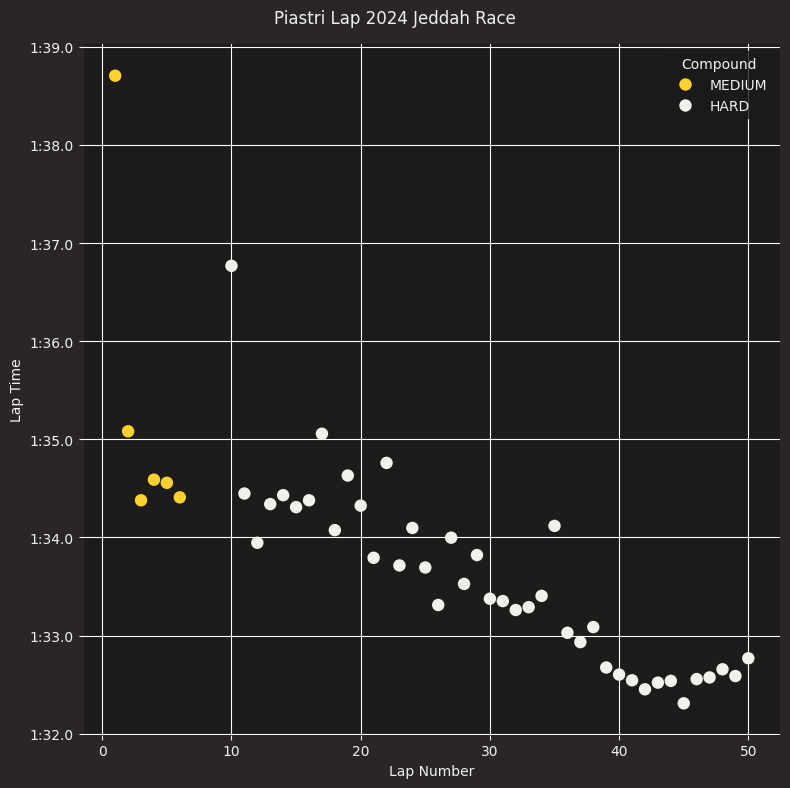

In [8]:
driver_laps = race.laps.pick_driver("PIA").pick_quicklaps().reset_index()
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Piastri Lap 2024 Jeddah Race")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

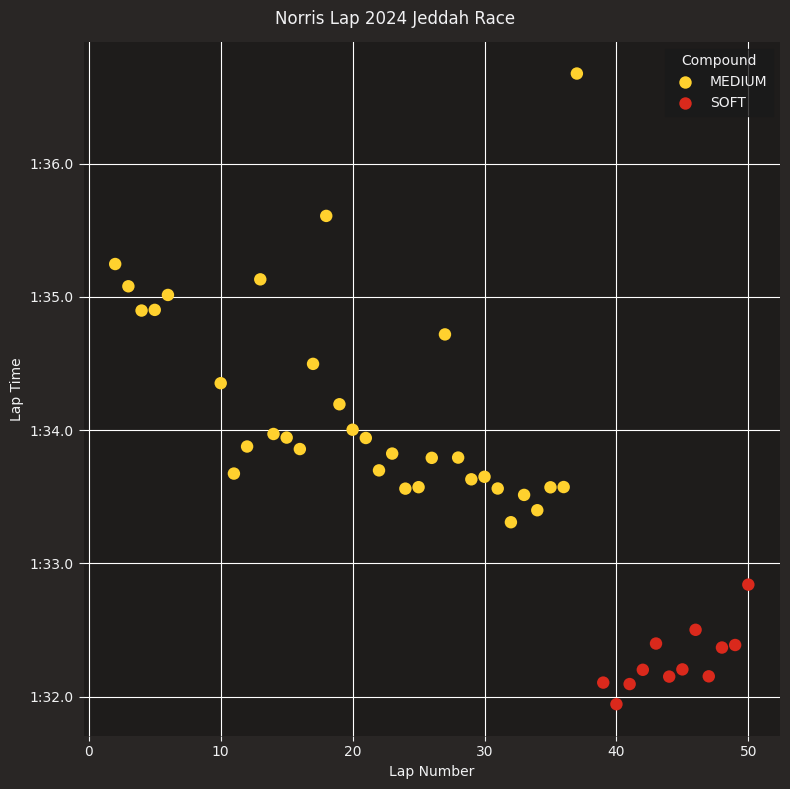

In [12]:
driver_laps = race.laps.pick_driver("NOR").pick_quicklaps().reset_index()
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Norris Lap 2024 Jeddah Race")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()